In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [5]:
# read concerts csv outputted by web scraper
data_raw = pd.read_csv('concerts.csv')
data_raw = data_raw[['date', 'artist', 'venue', 'time', 'minprice', 'maxprice', 'neighborhood', 'address']]

In [6]:
# view number of concert entries
len(data_raw)

4329

In [18]:
# remove observations with missing values
data = data_raw.dropna()

In [19]:
# see number of concerts after cleaning data
len(data)

4265

In [7]:
# see number of free concerts
len(data_raw[data_raw.minprice == 0])

533

In [29]:
data_raw[data_raw['venue'] == 'Gramercy Theatre'].count()

date            54
artist          54
venue           54
time            54
minprice        54
maxprice        54
neighborhood    54
address         54
dtype: int64

In [31]:
# see largest maximum price for a concert
max(data_raw.maxprice)

695.0

In [32]:
data_raw[data_raw.maxprice == 695]

,date,artist,venue,time,minprice,maxprice,neighborhood,address
3658,2015-09-26,Ariana Grande,Barclays Center,7:30 p.m.,39.5,695,Brooklyn,"620 Atlantic Ave., Brooklyn, NY, 11217"


In [108]:
# get minimum & maximmum ticket prices for non-free concerts
minprice = data.minprice[data.minprice > 0]
maxprice = data.maxprice[data.maxprice > 0]

0    26.75
1    26.75
2    26.75
3    26.75
4    69.50
Name: minprice, dtype: float64

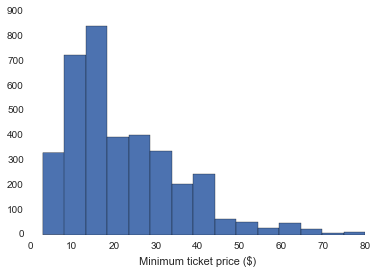

In [116]:
# plot histogram for minimum ticket prices
plt.hist(minprice[minprice <= 80], bins = 15)
plt.xlabel('Minimum ticket price ($)')
plt.savefig('minprice.png')

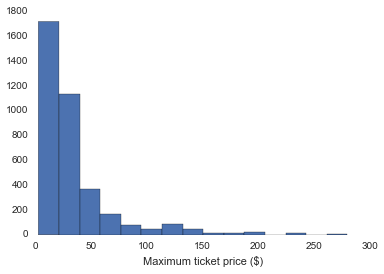

In [115]:
# plot histogram for maximum ticket prices
plt.hist(maxprice[maxprice <= 300], bins = 15)
plt.xlabel('Maximum ticket price ($)')
plt.savefig('maxprice.png')

In [83]:
# get listing of top neighborhoods by # of concerts
n_count = data_raw.groupby('neighborhood').count('date')
n_count = n_count.sort_index(by = ['date'], ascending = False)
n_count = n_count["date"]

In [86]:
n_count.head(10)

neighborhood
New Jersey           439
Lower East Side      404
West 40s             362
Brooklyn             354
East Village         325
East 70s             325
West Village         261
Greenwich Village    243
Noho                 175
West 50s             159
Name: date, dtype: int64

In [89]:
# see average minimum price for concert tickets (non-free)
np.mean(minprice)

22.211599678456594

In [90]:
# see average maximum price for concert tickets (non-free)
np.mean(maxprice)

35.197234726688102